# Часть 1 - Работа с библиотекой NumPy

## Задача №1

Создать матрицу размером 8х8 элементов, состоящую из нулей. Заполнить эту матрицу значениями, расположенными в шахматном порядке. Задачу решить через срезы массива NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.zeros((8, 8), int) # Создадим нулевую матрицу 8х8
a

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# выберем все строки, начиная со второй и с шагом 2 и в соответствие поставим столбцы, начиная с первого с шагом 2
a[1::2, ::2] = 1 
a

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [ ]:
# выберем все строки, начиная с первой и с шагом 2 и в соответствие поставим столбцы, начиная со второго с шагом 2
a[::2, 1::2] = 1 
a

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

Нашел еще одно решение с помощью функции *numpy.tile (b , reps)* - строит массив, повторив массив b reps число раз.

In [5]:
b = np.array([[0,1],[1,0]])
b

array([[0, 1],
       [1, 0]])

In [6]:
B = np.tile(b, (4,4)) # повторили массив "b" 4 раза построчно и 4 раза по столбцам
B

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [ ]:
# Записываем массив в файл CSV
# файл будет называться array.csv, записываем его от переменной B, разделитель запятая, формат данных целое число
np.savetxt("array.csv", B, delimiter=",", fmt="%d") 

## Задача №2

Средствами NumPy сформируйте вектор из 2000 случайных величин, распределенных по нормальному закону с математическим ожиданием 0 и дисперсией 5. Средствами NumPy вычислите для полученного вектора экспериментальное значение математического ожидания (среднее значение) и дисперсию.


In [8]:
# Создадим нормальное распределение с мат ожиданием 0 и средним квадратичным отклонением (корень из дисперсии 5).

sko = np.sqrt(5) # среднее квадратичное отклонение
mo = 0 # мат ожидание

# зададим точку отсчета
np.random.seed(123)
vektor = np.random.normal(mo, sko, 2000)


In [9]:
vektor

array([-2.42754383,  2.23013222,  0.63275916, ..., -0.80341188,
       -3.59938763,  0.03034358])

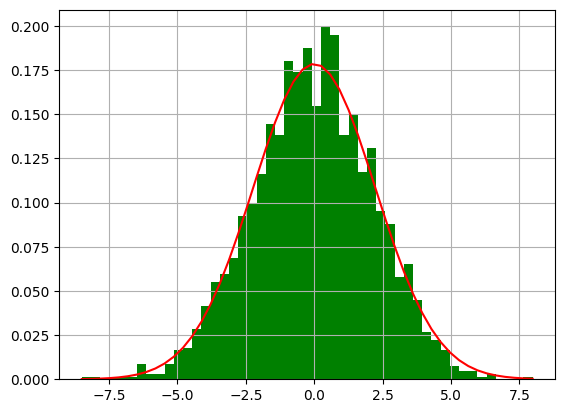

In [ ]:
# Построим график плотности распределения
count, bins, ignored = plt.hist(vektor, 49, 
                                density=True,  
                                color='green') 
x = np.linspace(min(bins), 
                max(bins)) 
  
pdf = 1/(sko * np.sqrt(2 * np.pi)) * np.exp( - (bins - mo)**2 / (2 * sko**2)) # Плотность вероятности для Распределения Гаусса
  
# assign other attributes 
plt.plot(x, pdf, color='red') 
plt.grid() 
plt.show() 

In [20]:
print(f'Экспериментальное значение мат. ожидания (среднего значения) в scipy.stats: {vektor.mean():.3f}')
print(f'Экспериментальное значение мат. ожидания (среднего значения) в numpy: {np.mean(vektor):.3f}')

Экспериментальное значение мат. ожидания (среднего значения) в scipy.stats: -0.035
Экспериментальное значение мат. ожидания (среднего значения) в numpy: -0.035


In [22]:
print(f'Экспериментальное значение дисперсии в scipy.stats: {vektor.var():.3f}')
print(f'Экспериментальное значение дисперсии в numpy: {np.var(vektor):.3f}')

Экспериментальное значение дисперсии в scipy.stats: 4.801
Экспериментальное значение дисперсии в numpy: 4.801


# Часть 2 - Работа с библиотекой Pandas

In [1]:
import pandas as pd

## Загрузить один из файлов csv в DataFrame по ссылке

In [ ]:
# Загрузим один из файлов csv в DataFrame по ссылке
df = pd.read_csv('https://www.geos.ed.ac.uk/~weather/jcmb_ws/JCMB_2015_Nov.csv')

In [ ]:
# Посмотрим первые 5 строк
df.head()

,date-time,atmospheric pressure (mBar),rainfall (mm),wind speed (m/s),wind direction (degrees),surface temperature (C),relative humidity (%),solar flux (Kw/m2),battery (V)
0,2015/11/01 00:01,1025,0,0,0,9.74,91.5,0,13.76
1,2015/11/01 00:02,1025,0,0,0,9.75,91.2,0,13.76
2,2015/11/01 00:03,1025,0,0,0,9.75,91.3,0,13.77
3,2015/11/01 00:04,1025,0,0,0,9.77,91.2,0,13.76
4,2015/11/01 00:05,1025,0,0,0,9.83,91.2,0,13.77


In [ ]:
# Посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date-time                    2201 non-null   object 
 1   atmospheric pressure (mBar)  2201 non-null   int64  
 2   rainfall (mm)                2201 non-null   int64  
 3   wind speed (m/s)             2201 non-null   int64  
 4   wind direction (degrees)     2201 non-null   int64  
 5   surface temperature (C)      2201 non-null   float64
 6   relative humidity (%)        2201 non-null   float64
 7   solar flux (Kw/m2)           2201 non-null   int64  
 8   battery (V)                  2201 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 154.9+ KB


In [46]:
df.describe()

,atmospheric_pressure_(mBar),rainfall_(mm),wind_speed_(m_per_s),wind_direction_(degrees),surface_temperature_(C),relative_humidity_(%),solar_flux_(Kw/m2),battery_(V)
count,1000.000000,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.0,1000.000000
mean,1024.819000,0.0,0.0,0.0,10.758019,81.545140,0.0,13.723760
std,0.585305,0.0,0.0,0.0,2.789492,10.590713,0.0,0.106375
min,1024.000000,0.0,0.0,0.0,5.977000,64.110000,0.0,13.550000
25%,1024.000000,0.0,0.0,0.0,8.730000,69.692500,0.0,13.600000
50%,1025.000000,0.0,0.0,0.0,9.875000,82.300000,0.0,13.770000
75%,1025.000000,0.0,0.0,0.0,13.810000,90.700000,0.0,13.810000
max,1026.000000,0.0,0.0,0.0,15.140000,97.900000,0.0,13.860000


## Посмотреть на наименования столбцов

 При необходимости, сократить или сделать более понятными.

In [9]:
df.columns

Index(['date-time', 'atmospheric pressure (mBar)', 'rainfall (mm)',
       'wind speed (m/s)', 'wind direction (degrees)',
       'surface temperature (C)', 'relative humidity (%)',
       'solar flux (Kw/m2)', 'battery (V)'],
      dtype='object')

**При написании чистого кода рекомендуется в названиях столбцов для разделения слов использовать нижнее подчеркивание. Также для разделения слов не рекомендуется использовать тире. Переименуем наши столбцы, чтобы они выглядели более эстетично.**

In [10]:
df = df.rename(columns={'date-time': 'date_time',
                        'atmospheric pressure (mBar)': 'atmospheric_pressure_(mBar)',
                        'rainfall (mm)': 'rainfall_(mm)',
                        'wind speed (m/s)': 'wind_speed_(m_per_s)',
                        'wind direction (degrees)': 'wind_direction_(degrees)',
                        'surface temperature (C)': 'surface_temperature_(C)',
                        'relative humidity (%)': 'relative_humidity_(%)',
                        'solar flux (Kw/m2)': 'solar_flux_(Kw/m2)',
                        'battery (V)': 'battery_(V)'})
df

,date_time,atmospheric_pressure_(mBar),rainfall_(mm),wind_speed_(m_per_s),wind_direction_(degrees),surface_temperature_(C),relative_humidity_(%),solar_flux_(Kw/m2),battery_(V)
0,2015/11/01 00:01,1025,0,0,0,9.74,91.5,0,13.76
1,2015/11/01 00:02,1025,0,0,0,9.75,91.2,0,13.76
2,2015/11/01 00:03,1025,0,0,0,9.75,91.3,0,13.77
3,2015/11/01 00:04,1025,0,0,0,9.77,91.2,0,13.76
4,2015/11/01 00:05,1025,0,0,0,9.83,91.2,0,13.77
...,...,...,...,...,...,...,...,...,...
2196,2015/11/02 12:37,1021,0,0,0,10.51,99.9,0,13.64
2197,2015/11/02 12:38,1021,0,0,0,10.45,99.9,0,13.64
2198,2015/11/02 12:39,1021,0,0,0,10.54,99.9,0,13.64
2199,2015/11/02 12:40,1021,0,0,0,10.58,99.9,0,13.64


## Сохранить первые 1000 строк DataFrame в CSV-файл

In [ ]:
# Срез по первым тысячам строк
df_new = df.iloc[:1000]

In [ ]:
# Первые 5 строк
df_new.head()

,date_time,atmospheric_pressure_(mBar),rainfall_(mm),wind_speed_(m_per_s),wind_direction_(degrees),surface_temperature_(C),relative_humidity_(%),solar_flux_(Kw/m2),battery_(V)
0,2015/11/01 00:01,1025,0,0,0,9.74,91.5,0,13.76
1,2015/11/01 00:02,1025,0,0,0,9.75,91.2,0,13.76
2,2015/11/01 00:03,1025,0,0,0,9.75,91.3,0,13.77
3,2015/11/01 00:04,1025,0,0,0,9.77,91.2,0,13.76
4,2015/11/01 00:05,1025,0,0,0,9.83,91.2,0,13.77


In [ ]:
# Последние 5 строк
df_new.tail()

,date_time,atmospheric_pressure_(mBar),rainfall_(mm),wind_speed_(m_per_s),wind_direction_(degrees),surface_temperature_(C),relative_humidity_(%),solar_flux_(Kw/m2),battery_(V)
995,2015/11/01 16:36,1025,0,0,0,12.85,71.1,0,13.63
996,2015/11/01 16:37,1025,0,0,0,12.84,71.2,0,13.63
997,2015/11/01 16:38,1025,0,0,0,12.83,71.3,0,13.63
998,2015/11/01 16:39,1025,0,0,0,12.82,71.2,0,13.63
999,2015/11/01 16:40,1025,0,0,0,12.77,71.3,0,13.63


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date_time                    1000 non-null   object 
 1   atmospheric_pressure_(mBar)  1000 non-null   int64  
 2   rainfall_(mm)                1000 non-null   int64  
 3   wind_speed_(m_per_s)         1000 non-null   int64  
 4   wind_direction_(degrees)     1000 non-null   int64  
 5   surface_temperature_(C)      1000 non-null   float64
 6   relative_humidity_(%)        1000 non-null   float64
 7   solar_flux_(Kw/m2)           1000 non-null   int64  
 8   battery_(V)                  1000 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 70.4+ KB


In [ ]:
# Сохраним поллучившийся DataFrame в отдельный файл. 
# Добавлять индексы не будем, чтобы потом при выгрузке обратно, получить такой же исходный DataFrame
df_new.to_csv('df_new.csv', index=False)

## Загрузить сохраненный DataFrame и сделать срезы

In [ ]:
# Загрузим DataFrame и посмотрим первые 20 строк
df = pd.read_csv('df_new.csv')
df.head(20)

,date_time,atmospheric_pressure_(mBar),rainfall_(mm),wind_speed_(m_per_s),wind_direction_(degrees),surface_temperature_(C),relative_humidity_(%),solar_flux_(Kw/m2),battery_(V)
0,2015/11/01 00:01,1025,0,0,0,9.74,91.5,0,13.76
1,2015/11/01 00:02,1025,0,0,0,9.75,91.2,0,13.76
2,2015/11/01 00:03,1025,0,0,0,9.75,91.3,0,13.77
3,2015/11/01 00:04,1025,0,0,0,9.77,91.2,0,13.76
4,2015/11/01 00:05,1025,0,0,0,9.83,91.2,0,13.77
5,2015/11/01 00:06,1024,0,0,0,9.84,91.1,0,13.76
6,2015/11/01 00:07,1024,0,0,0,9.87,91.0,0,13.76
7,2015/11/01 00:08,1024,0,0,0,9.90,90.8,0,13.77
8,2015/11/01 00:09,1024,0,0,0,9.86,90.7,0,13.77
9,2015/11/01 00:10,1024,0,0,0,9.81,90.5,0,13.77


In [22]:
# И последние 20 строк
df.tail(20)

,date_time,atmospheric_pressure_(mBar),rainfall_(mm),wind_speed_(m_per_s),wind_direction_(degrees),surface_temperature_(C),relative_humidity_(%),solar_flux_(Kw/m2),battery_(V)
980,2015/11/01 16:21,1025,0,0,0,12.94,71.0,0,13.61
981,2015/11/01 16:22,1025,0,0,0,12.92,71.1,0,13.61
982,2015/11/01 16:23,1025,0,0,0,12.93,71.0,0,13.61
983,2015/11/01 16:24,1025,0,0,0,12.90,71.1,0,13.61
984,2015/11/01 16:25,1025,0,0,0,12.93,71.1,0,13.62
985,2015/11/01 16:26,1025,0,0,0,12.96,70.9,0,13.62
986,2015/11/01 16:27,1025,0,0,0,12.95,70.9,0,13.62
987,2015/11/01 16:28,1025,0,0,0,12.94,70.9,0,13.62
988,2015/11/01 16:29,1025,0,0,0,12.95,70.9,0,13.62
989,2015/11/01 16:30,1025,0,0,0,12.93,70.8,0,13.62


In [ ]:
# Смотрим только столбец date_time
df.date_time

0      2015/11/01 00:01
1      2015/11/01 00:02
2      2015/11/01 00:03
3      2015/11/01 00:04
4      2015/11/01 00:05
             ...       
995    2015/11/01 16:36
996    2015/11/01 16:37
997    2015/11/01 16:38
998    2015/11/01 16:39
999    2015/11/01 16:40
Name: date_time, Length: 1000, dtype: object

In [ ]:
# Смотрим первые 20 строк столбцов date_time и surface_temperature_(C)
df[['date_time', 'surface_temperature_(C)']].head(20)

,date_time,surface_temperature_(C)
0,2015/11/01 00:01,9.74
1,2015/11/01 00:02,9.75
2,2015/11/01 00:03,9.75
3,2015/11/01 00:04,9.77
4,2015/11/01 00:05,9.83
5,2015/11/01 00:06,9.84
6,2015/11/01 00:07,9.87
7,2015/11/01 00:08,9.90
8,2015/11/01 00:09,9.86
9,2015/11/01 00:10,9.81


In [ ]:
# Данные 20 строки (индекс 19)
df.iloc[19]

date_time                      2015/11/01 00:20
atmospheric_pressure_(mBar)                1024
rainfall_(mm)                                 0
wind_speed_(m_per_s)                          0
wind_direction_(degrees)                      0
surface_temperature_(C)                     9.9
relative_humidity_(%)                      90.9
solar_flux_(Kw/m2)                            0
battery_(V)                               13.76
Name: 19, dtype: object

In [ ]:
# Смотрим первые 5 строк (индекс 0 - индекс 4) и столбцы с первого по 3 (индекс 0 - индекс 2) 
df.iloc[0:5, 0:3]

,date_time,atmospheric_pressure_(mBar),rainfall_(mm)
0,2015/11/01 00:01,1025,0
1,2015/11/01 00:02,1025,0
2,2015/11/01 00:03,1025,0
3,2015/11/01 00:04,1025,0
4,2015/11/01 00:05,1025,0


In [ ]:
# Данные, где значения в столбце surface_temperature_(C) больше 15
df[df['surface_temperature_(C)'] > 15]

,date_time,atmospheric_pressure_(mBar),rainfall_(mm),wind_speed_(m_per_s),wind_direction_(degrees),surface_temperature_(C),relative_humidity_(%),solar_flux_(Kw/m2),battery_(V)
815,2015/11/01 13:36,1025,0,0,0,15.05,66.56,0,13.56
816,2015/11/01 13:37,1025,0,0,0,15.02,66.33,0,13.56
817,2015/11/01 13:38,1025,0,0,0,15.02,66.59,0,13.56
818,2015/11/01 13:39,1025,0,0,0,15.12,66.33,0,13.56
819,2015/11/01 13:40,1025,0,0,0,15.14,66.43,0,13.56
820,2015/11/01 13:41,1025,0,0,0,15.02,66.66,0,13.56


## Найдите количество уникальных значений столбца и отобразите их на экране